### Test IHDP data

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

from lib.bandits import LinUCB, ThresholdBandit, GreedyBandit, ThresholdConsBandit, RarelySwitchingLinUCB, RCTBandit,\
    ThresholdMaxConsBandit, ThresholdMaxConsGreedyBandit
from lib.generator import IHDPGenerator, IHDPParams
import numpy as np 
import pandas
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
sns.set_style('ticks')

def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
intercept = True #constant term in linear model
M = 100            #number of runs
fn_in = 'data/ihdp_npci_1-100.all.npz'
save = False

In [3]:
params = IHDPParams(fn_in)

In [4]:
N = params.n       #number of timesteps
k = 2           #number of arms
d = params.d           #dimension of context (includes one dim for intercept term if present)
delta = 1./N          #confidence level, adjusted for horizon

## Look at the dataset

In [5]:
params.ctx.shape

(747, 25, 100)

In [6]:
params = IHDPParams(fn_in)
params.ctx[0:10,:,0]

array([[ 0.29497202, -0.20294594, -0.36089799, -0.87960599,  0.12101724,
        -1.02340239,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  2.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.74260258, -0.60271001,  0.75619095,  0.16170253, -0.7542236 ,
         0.46713796,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.13800138,  0.99634625, -0.73326097,  0.16170253,  0.74618926,
         2.12329391,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0

## Run online learning algs

In [7]:
regret_rct = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    bandit = RCTBandit(generator, delta, n_pulls=N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = bandit.step()
        regret_rct[j,i] = reg
    if hasattr(bandit, 'update_theta'):
        updatepol_rct[m,:] = bandit.update_theta[0:N]

Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/1

In [8]:
regret_ucb = np.zeros((M,N))
updatepol_ucb = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    linucb = LinUCB(generator, delta, n_pulls=N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = linucb.step()
        regret_ucb[j,i] = reg
    if hasattr(linucb, 'update_theta'):
        updatepol_ucb[m,:] = linucb.update_theta[0:N]

Run 1/100


lib/bandits.py:107: RuntimeWarning: invalid value encountered in sqrt
  self.beta = lambda v: np.sqrt(self.lamd)*L + np.sqrt(np.log(np.linalg.det(v))-self.d*np.log(self.lamd)-2*np.log(delta))


Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/100
Run 93/

In [9]:
regret_thr = np.zeros((M,N))
updatepol_thr = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = ThresholdBandit(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_thr[j,i] = reg
    if hasattr(thresholdbandit, 'update_theta'):
        updatepol_thr[j,:] = thresholdbandit.update_theta[0:N]

Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/1

In [10]:
regret_conthr = np.zeros((M,N))
updatepol_thrcons = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = ThresholdConsBandit(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_conthr[j,i] = reg
    if hasattr(thresholdbandit, 'update_theta'):
        updatepol_thrcons[j,:] = thresholdbandit.update_theta[0:N]

Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/1

In [11]:
regret_gre = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = GreedyBandit(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_gre[j,i] = reg

Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/1

In [12]:
regret_rs = np.zeros((M,N))
updatepol_rs = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = RarelySwitchingLinUCB(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_rs[j,i] = reg
    if hasattr(thresholdbandit, 'update_theta'):
        updatepol_rs[j,:] = thresholdbandit.update_theta[0:N]

Run 1/100
Run 2/100
Run 3/100
Run 4/100
Run 5/100
Run 6/100
Run 7/100
Run 8/100
Run 9/100
Run 10/100
Run 11/100
Run 12/100
Run 13/100
Run 14/100
Run 15/100
Run 16/100
Run 17/100
Run 18/100
Run 19/100
Run 20/100
Run 21/100
Run 22/100
Run 23/100
Run 24/100
Run 25/100
Run 26/100
Run 27/100
Run 28/100
Run 29/100
Run 30/100
Run 31/100
Run 32/100
Run 33/100
Run 34/100
Run 35/100
Run 36/100
Run 37/100
Run 38/100
Run 39/100
Run 40/100
Run 41/100
Run 42/100
Run 43/100
Run 44/100
Run 45/100
Run 46/100
Run 47/100
Run 48/100
Run 49/100
Run 50/100
Run 51/100
Run 52/100
Run 53/100
Run 54/100
Run 55/100
Run 56/100
Run 57/100
Run 58/100
Run 59/100
Run 60/100
Run 61/100
Run 62/100
Run 63/100
Run 64/100
Run 65/100
Run 66/100
Run 67/100
Run 68/100
Run 69/100
Run 70/100
Run 71/100
Run 72/100
Run 73/100
Run 74/100
Run 75/100
Run 76/100
Run 77/100
Run 78/100
Run 79/100
Run 80/100
Run 81/100
Run 82/100
Run 83/100
Run 84/100
Run 85/100
Run 86/100
Run 87/100
Run 88/100
Run 89/100
Run 90/100
Run 91/100
Run 92/1

In [13]:
regret_mcg = np.zeros((M,N))
updatepol_mcg = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = ThresholdMaxConsGreedyBandit(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_mcg[j,i] = reg
    if hasattr(thresholdbandit, 'update_theta'):
        updatepol_mcg[j,:] = thresholdbandit.update_theta[0:N]

Run 1/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 2/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 13/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 24/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 35/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 36/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 47/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Run 58/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 59/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 70/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 82/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 83/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 93/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 94/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

In [14]:
regret_mc = np.zeros((M,N))
updatepol_mc = np.zeros((M,N))
for j in range(M):
    print("Run %d/%d"%(j+1,M))
    params = IHDPParams(fn_in)
    generator = IHDPGenerator(params)
    thresholdbandit = ThresholdMaxConsBandit(generator, delta, n_pulls = N)
    for i in range(N):
        (ctx, arm_idx, obs, reg) = thresholdbandit.step()
        regret_mc[j,i] = reg
    if hasattr(thresholdbandit, 'update_theta'):
        updatepol_mc[j,:] = thresholdbandit.update_theta[0:N]

Run 1/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 2/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta

Run 11/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 12/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 21/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 22/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 32/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 42/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Ru

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 53/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 63/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 64/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 73/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 74/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Run 83/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 84/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating the

Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Run 94/100
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Updating theta_tilde
Up

## The regret

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/usr/local/lib/python2.7/dist-packages/ipykerne

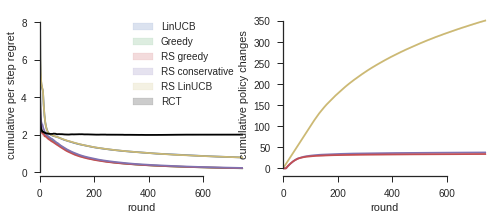

In [17]:
fig, axes = plt.subplots(1,2, figsize = (8,3))
sns.tsplot(np.divide(np.cumsum(regret_ucb, axis=1), np.arange(N)), color = 'C0', ax = axes[0])
sns.tsplot(np.divide(np.cumsum(regret_gre, axis=1), np.arange(N)), color = 'C1', ax = axes[0])
sns.tsplot(np.divide(np.cumsum(regret_mcg, axis=1), np.arange(N)), color = 'C2', ax = axes[0])
sns.tsplot(np.divide(np.cumsum(regret_mc, axis=1), np.arange(N)), color = 'C3', ax = axes[0])
sns.tsplot(np.divide(np.cumsum(regret_rs, axis=1), np.arange(N)), color = 'C4', ax = axes[0])
sns.tsplot(np.divide(np.cumsum(regret_rct, axis=1), np.arange(N)), color = 'black', ax = axes[0])

axes[0].legend(['LinUCB', 'Greedy', 'RS greedy', 'RS conservative', 'RS LinUCB', 'RCT'])
axes[0].set_xlabel('round')
axes[0].set_ylabel('cumulative per step regret')

sns.tsplot(np.cumsum(updatepol_rs, axis=1), color = 'C4', ax = axes[1])
sns.tsplot(np.cumsum(updatepol_mc, axis=1), color = 'C3', ax = axes[1])
sns.tsplot(np.cumsum(updatepol_mcg, axis=1), color = 'C2', ax = axes[1])

axes[1].set_xlabel('round')
axes[1].set_ylabel('cumulative policy changes')

sns.despine(trim = True)
plt.savefig('./figs/ihdp.pdf')

In [18]:
#The number of changes in policy.....
print('Mean changes for mcg: %f'%np.mean(np.cumsum(updatepol_mcg, axis=1)[:,-1]))
print('Mean changes for mc: %f'%np.mean(np.cumsum(updatepol_mc, axis=1)[:,-1]))
print('Mean changes for rs: %f'%np.mean(np.cumsum(updatepol_rs, axis=1)[:,-1]))
print('Mean changes for thrcons: %f'%np.mean(np.cumsum(updatepol_thrcons, axis=1)[:,-1]))
print('Mean changes for thrgre: %f'%np.mean(np.cumsum(updatepol_thr, axis=1)[:,-1]))

Mean changes for mcg: 34.070000
Mean changes for mc: 37.840000
Mean changes for rs: 351.630000
Mean changes for thrcons: 129.140000
Mean changes for thrgre: 55.500000
